# Linear SVM 

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Load and Clean Data

In [2]:
x, label = load_svmlight_file('mnist.scale')
x = x.toarray()
label = label.astype(int)

In [3]:
label_bits = []
for i, j in enumerate(label):
    j = "{:04b}".format(j)
    label_bits.append(j)

In [4]:
label_1 = []
label_2 = []
label_3 = []
label_4 = []
for i, j in enumerate(label_bits):
    label_1.append(j[0])
    label_2.append(j[1])
    label_3.append(j[2])
    label_4.append(j[3])

label_1 = np.array(label_1).astype(int)
label_2 = np.array(label_2).astype(int)
label_3 = np.array(label_3).astype(int)
label_4 = np.array(label_4).astype(int)

In [5]:
labels_new = np.vstack((label_1,label_2,label_3,label_4))
labels_new = labels_new.T
for i in labels_new:
    ''.join(map(str, i))

## Model

In [6]:
class MC_Linear_SVM:
    
    def __init__(self, lr = 0.005, lam=0.01, its=200):
        self.lam = lam
        self.its = its
        self.lr = lr
        self.w = None
        self.b = None
        
    def model(self, X, y):
        y = np.where(y <= 0, -1, 1)
        samples, feats = X.shape
        self.w = np.zeros(feats)
        self.b = 0
        for i in range(self.its):
            for j in X:
                k = random.randint(0, len(X)-1)
                value = y[k] * (np.dot(X[k], self.w))
                if value < 1:
                    self.w = self.w + self.lr*(y[k]*X[k] - (self.lam*self.w))
                else:
                    self.w = self.w + self.lr*(-self.lam*self.w)
                    
    def predict(self, X):
        result = np.dot(X, self.w)
        return np.sign(result)

## ECOC

### Iterate through columns of label ndarray. Get predictions then get accuracy for individual bits and entire bits.

In [7]:
predicted_bits = []
actual_bits = []
j = 0
for i in labels_new.T:
    X_train, X_test, y_train, y_test = train_test_split(x, i, test_size=0.3, random_state=42)
    svm = MC_Linear_SVM()
    svm.model(X_train, y_train)
    predicted = svm.predict(X_test)
    
    preds = np.where(predicted <= 0, 0, 1)
    correct = 0
    for k,l in enumerate(y_test):
        if (preds[k] == y_test[k]):
            correct+=1
    print("Accuracy for bit", j+1, ": ", "{:.00%}".format(correct/len(y_test)))
    actual_bits.append(y_test)
    predicted_bits.append(preds)
    j+=1

Accuracy for bit 1 :  89%
Accuracy for bit 2 :  86%
Accuracy for bit 3 :  89%
Accuracy for bit 4 :  88%


### Convert predicted bits to ints

In [8]:
concat_labels = np.vstack(predicted_bits)
concat_labels = concat_labels.T

In [9]:
bits = []
for i in concat_labels:
    i = i.astype('str')
    i = ''.join(map(str,i))
    bits.append(i)

pred_nums = []
for i in bits:
    x = int(i, 2)
    if (x > 9):
        x = 9
    pred_nums.append(x)

### Convert actual bits to ints

In [10]:
concat_labels_actual = np.vstack(actual_bits)
concat_labels_actual = concat_labels_actual.T

In [11]:
bits_actual = []
for i in concat_labels_actual:
    i = i.astype('str')
    i = ''.join(map(str,i))
    bits_actual.append(i)

actual_nums = []
for i in bits_actual:
    x = int(i, 2)
    actual_nums.append(x)

### Get Accuracy for Ints

In [12]:
correct = 0
for i,j in enumerate(actual_nums):
    if (pred_nums[i] == actual_nums[i]):
        correct+=1

print("Accuracy for predicted integers: ", "{:.00%}".format(correct/len(actual_nums)))

Accuracy for predicted integers:  65%


### Confusion Matrix

In [13]:
con_mat = confusion_matrix(actual_nums, pred_nums)

In [14]:
con_mat_df = pd.DataFrame(con_mat,
                     index = np.unique(actual_nums), 
                     columns = np.unique(actual_nums))

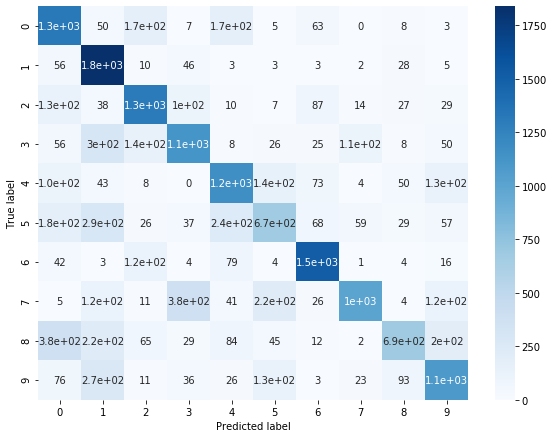

In [15]:
figure = plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()